# Nivell 1
#### Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Desktop/DataScience/datasets/DelayedFlights/DelayedFlights.csv')

# Variable descriptions
### Name	Description
-	Year	1987-2008
-	Month	1-12
-	DayofMonth	1-31
-	DayOfWeek	1 (Monday) - 7 (Sunday)
-	DepTime	actual departure time (local, hhmm)
-	CRSDepTime	scheduled departure time (local, hhmm)
-	ArrTime	actual arrival time (local, hhmm)
-	CRSArrTime	scheduled arrival time (local, hhmm)
-	UniqueCarrier	unique carrier code
-	FlightNum	flight number
-	TailNum	plane tail number
-	ActualElapsedTime	in minutes
-	CRSElapsedTime	in minutes
-	AirTime	in minutes
-	ArrDelay	arrival delay, in minutes
-	DepDelay	departure delay, in minutes
-	Origin	origin IATA airport code
-	Dest	destination IATA airport code
-	Distance	in miles
-	TaxiIn	taxi in time, in minutes
-	TaxiOut	taxi out time in minutes
-	Cancelled	was the flight cancelled?
-	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
-	Diverted	1 = yes, 0 = no
-	CarrierDelay	in minutes
-	WeatherDelay	in minutes
-	NASDelay	in minutes
-	SecurityDelay	in minutes
-	LateAircraftDelay	in minutes

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

# Columnas a borrar:
- **unamed: 0** es una repetición del índice
- Nos interesa unificar las tres columnas (**Year,Month, DayofMonth**) en una sola columna tipo DateTime
- **DayOfWeek** nos informa solo del día de la semana que es
- **DepTime,CRSDepTime,ArrTime,CRSArrTime** son las horas previstas y reales de llegada y salida, nos interesa más los intervalos entre las horas de llegada y salida, es información redundante con **ActualElapsedTime,CRSElapsedTime** que nos dan los intervalos en minutos previstos de vuelo y los reales, nos quedamos con estas dos últimas.
- **Cancelled** y **CancellationCode** tienen la misma información aunque esta última más detallada, por lo que podemos eliminar Cancelled

In [5]:
#unamed 0 es una repetición del índice
#eliminamos DayOfWeek,'DepTime','CRSDepTime','ArrTime','CRSArrTime','Cancelled'
df.drop(['Unnamed: 0','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','Cancelled'],'columns',inplace=True)
df.head()

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Distance,TaxiIn,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,WN,335,N712SW,128.0,150.0,116.0,-14.0,...,810,4.0,8.0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,WN,3231,N772SW,128.0,145.0,113.0,2.0,...,810,5.0,10.0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,WN,448,N428WN,96.0,90.0,76.0,14.0,...,515,3.0,17.0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,WN,3920,N464WN,90.0,90.0,77.0,34.0,...,515,3.0,10.0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,WN,378,N726SW,101.0,115.0,87.0,11.0,...,688,4.0,10.0,N,0,NaN,NaN,NaN,NaN,NaN


#### Exercici 2
Fes un informe complet del data set:

- Resumeix estadísticament les columnes d’interès
- Troba quantes dades faltants hi ha per columna
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
- Taula de les aerolínies amb més endarreriments acumulats
- Quins són els vols més llargs? I els més endarrerits?
- Etc.

**Resumen estadístico**

In [6]:
df.describe()

,Year,Month,DayofMonth,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


**Datos nulos por columna**

In [7]:
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
df.shape

(1936758, 23)

**Velocidad media de vuelo**

In [9]:
#Añadimos la columna Speed con la velocidad media de vuelo km/h
df['Speed']=np.round(df['Distance']*60/df['ActualElapsedTime'],2)
df.Speed.head()

0    379.69
1    379.69
2    321.88
3    343.33
4    408.71
Name: Speed, dtype: float64

**Ha llegado con retraso**

In [10]:
#Añadimos la columna Delayed,si ha llegado tarde (True) y sino (False)
df['Delayed']=df.ActualElapsedTime>df.CRSElapsedTime
#comparamos columnas para ver si cumple la desigualdad
df[['ActualElapsedTime','CRSElapsedTime','Delayed']].head()

,ActualElapsedTime,CRSElapsedTime,Delayed
0,128.0,150.0,False
1,128.0,145.0,False
2,96.0,90.0,True
3,90.0,90.0,False
4,101.0,115.0,False


In [11]:
#% de vuelos con retraso
df.Delayed.value_counts(normalize=True)*100

False    64.25351
True     35.74649
Name: Delayed, dtype: float64

El 65% llega puntual o antes de tiempo y el 35% con retraso

**Extra:Convertir fecha en tipo Datetime**

#### Información stack overflow:
[Convertir columnas Year, Month, Day tipo integer en datetime](https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas)

In [12]:
#Podemos usar cualquiera de las dos opciones
df['Date']=pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['DayofMonth']))
#df['Date']=pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

df=df.drop(['Year','Month','DayofMonth'],axis=1)

#cambiar el oden de las columnas, Date al principio
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df=df[cols]
df.head()

,Date,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Speed,Delayed
0,2008-01-03,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,...,8.0,N,0,NaN,NaN,NaN,NaN,NaN,379.69,False
1,2008-01-03,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,...,10.0,N,0,NaN,NaN,NaN,NaN,NaN,379.69,False
2,2008-01-03,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,...,17.0,N,0,NaN,NaN,NaN,NaN,NaN,321.88,True
3,2008-01-03,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,...,10.0,N,0,2.0,0.0,0.0,0.0,32.0,343.33,False
4,2008-01-03,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,...,10.0,N,0,NaN,NaN,NaN,NaN,NaN,408.71,False


In [13]:
df.Date.dtypes

dtype('<M8[ns]')

**Tabla con retrasos acumulados**

In [14]:
#Taula de les aerolínies amb més endarreriments acumulats
df.groupby('UniqueCarrier')['Delayed'].sum().sort_values(ascending=False)

UniqueCarrier
WN    86545.0
AA    74955.0
MQ    56125.0
OO    52687.0
DL    48351.0
UA    47456.0
XE    40090.0
NW    37596.0
CO    33863.0
US    33419.0
EV    30616.0
FL    29706.0
YV    26817.0
OH    23329.0
B6    21845.0
9E    19395.0
AS    14206.0
F9    11494.0
HA     3597.0
AQ      231.0
Name: Delayed, dtype: float64

**Vuelos más largos**

In [15]:
#Quins són els vols més llargs? I els més endarrerits?
dfVols=df[['Origin','Dest','Distance']].drop_duplicates()
dfVols=dfVols.sort_values('Distance',ascending=False)
print('Los vuelos más largos:\n',dfVols.head())

Los vuelos más largos:
        Origin Dest  Distance
178838    HNL  EWR      4962
173177    EWR  HNL      4962
96292     HNL  ATL      4502
96293     ATL  HNL      4502
66599     HNL  ORD      4243


#### Códigos aeropuertos
- EWR es el codigo de Aeropuerto de Nueva Jersey
- HNL es el código de Aeropuerto Honolulu
- ATL es el código e Aeropuerto de Atlanta
- ORD es el código de aeropuerto de Chicago

Vemos que los vuelos más largos se producen entre Honolulu (Hawai) y las ciudades de la costa Este de EEUU.

**Vuelos más atrasados**

In [16]:
df['Retrasos']=df['ActualElapsedTime']-df['CRSElapsedTime']
df_ret=df[['Origin','Dest','Retrasos']].sort_values('Retrasos',ascending=False)
df_ret.head()

,Origin,Dest,Retrasos
1488690,SEA,HNL,759.0
1367047,HNL,SEA,415.0
1930131,IAH,MSP,395.0
1779939,IAH,BTR,384.0
1173580,JFK,SFO,368.0


#### Códigos aeropuertos
- SEA es el codigo de Aeropuerto de Seattle
- HNL es el código de Aeropuerto Honolulu
- IAH es el código e Aeropuerto George Bush, Houston
- MSP es el código e Aeropuerto de Minneapolis
- BTR es el código de aeropuerto de Baton Rouge, Louisiana
- JFK es el código de aeropuerto JFK, Nueva York
- SFO es el código de aeropuerto de San Francisco

En primer lugar tenemos un vuelo entre Seattle a Honolulu, en segundo lugar otro con la misma ruta pero en sentido contrario. En tercer lugar un vuelo entre el aeropuerto de Houston y Minneapolis

#### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [17]:
#Borramos los null
df=df.dropna()
df.isnull().sum()

Date                 0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Speed                0
Delayed              0
Retrasos             0
dtype: int64

In [18]:
df.to_csv('df_processed.csv', index=False)

In [19]:
df.shape

(1247486, 24)

Excel tiene un límite de 1.048.576 filas por lo que al importar el csv a Excel deberemos ponerlas en dos sheets distintas.

#### Exercici 4 de la tasca 6
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

**Número de vuelos por aerolínea**

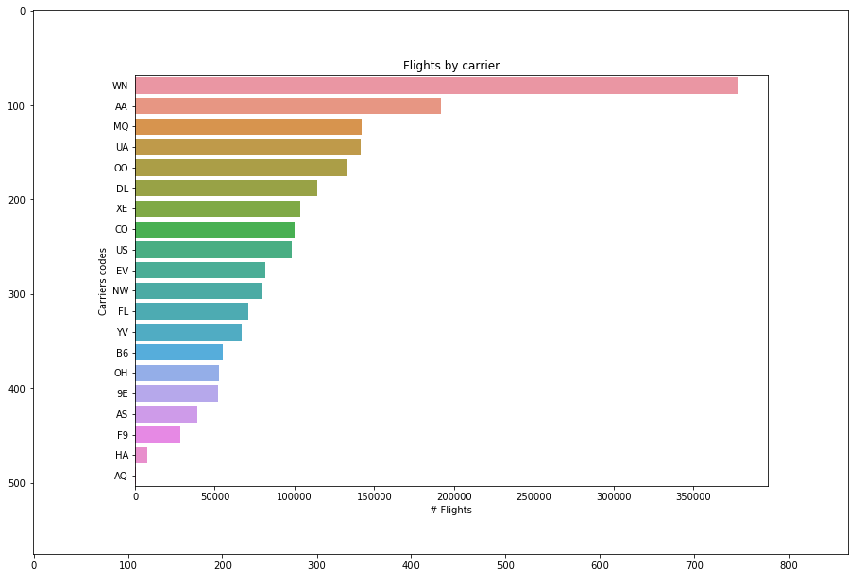

In [20]:
from PIL import Image
%matplotlib inline
plt.figure(figsize=(15,10))
pil_im = Image.open('flights by carrier.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()

**Retrasos por vuelo, 500 muestras**

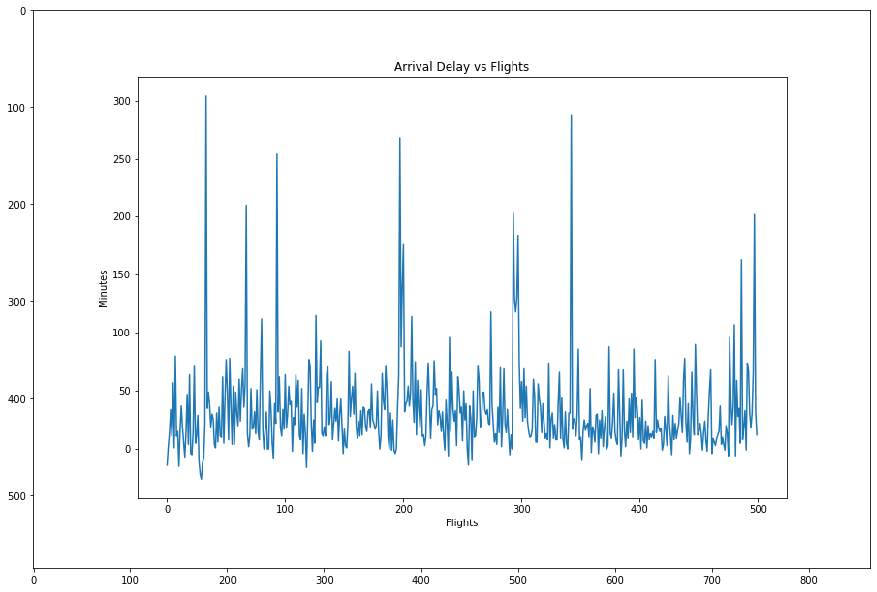

In [21]:
plt.figure(figsize=(15,15))
pil_im = Image.open('arrdelay.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()

**Boxplot de Arrival Departure por aerolínea**

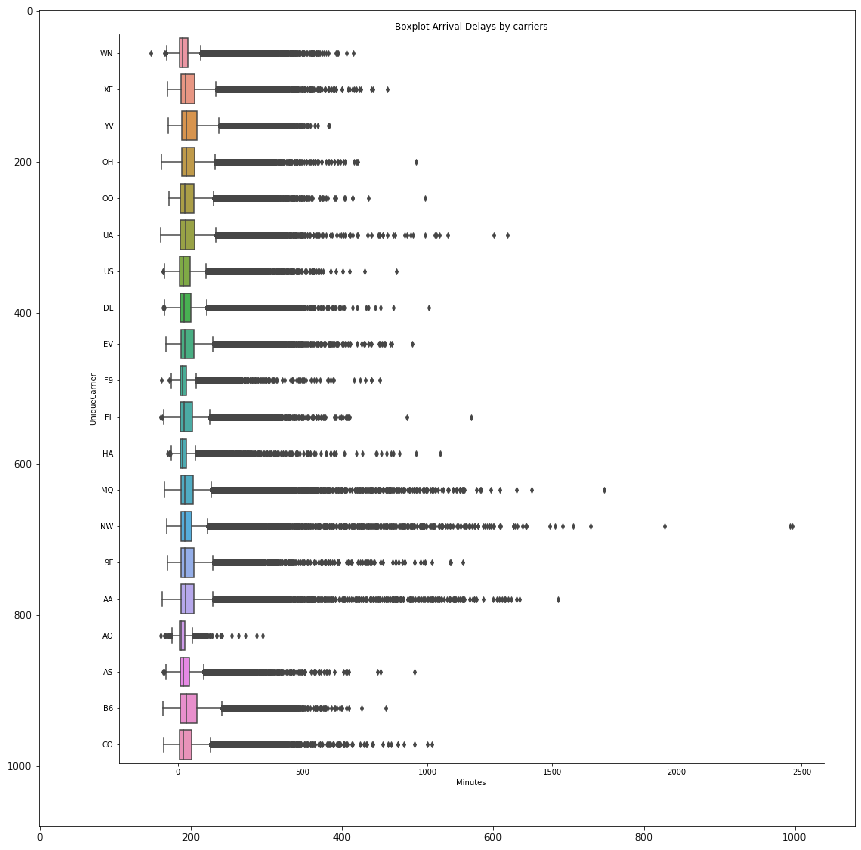

In [22]:
plt.figure(figsize=(15,15))
pil_im = Image.open('boxplot arrDelay by carrier.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()

**Histogramas de arrival y departure delays**

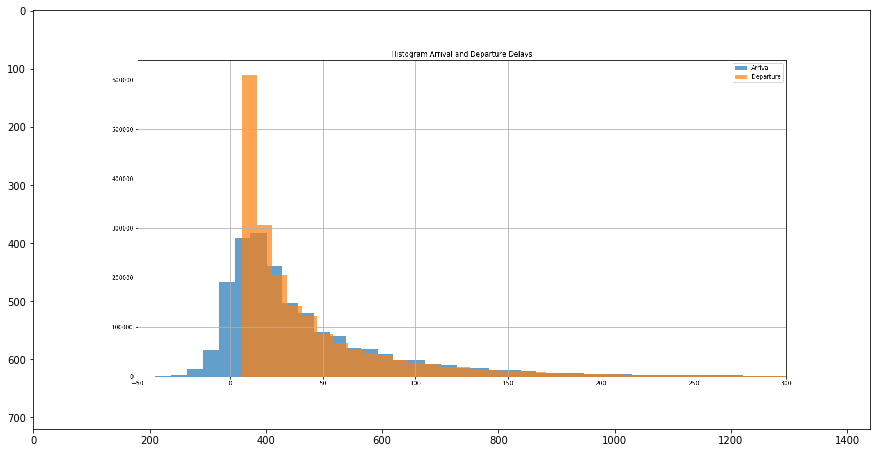

In [23]:
plt.figure(figsize=(15,15))
pil_im = Image.open('hist arrdelay depdelay.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()

**Scatterplot entre arrival y departure delays**

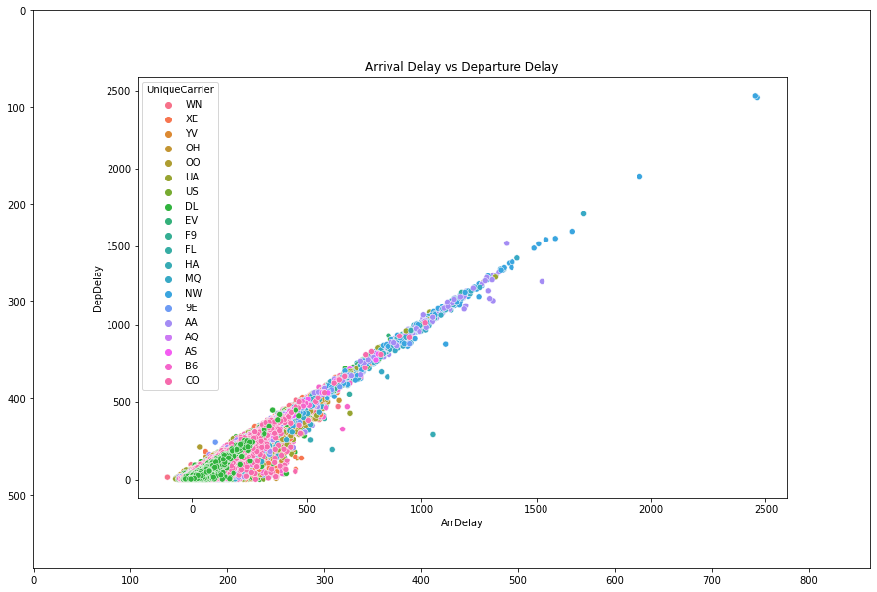

In [24]:
plt.figure(figsize=(15,15))
pil_im = Image.open('scatter arrdelay depdelay by carrier.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()

**Medias de arrival delay, departure delay y Air time por aerolínea**

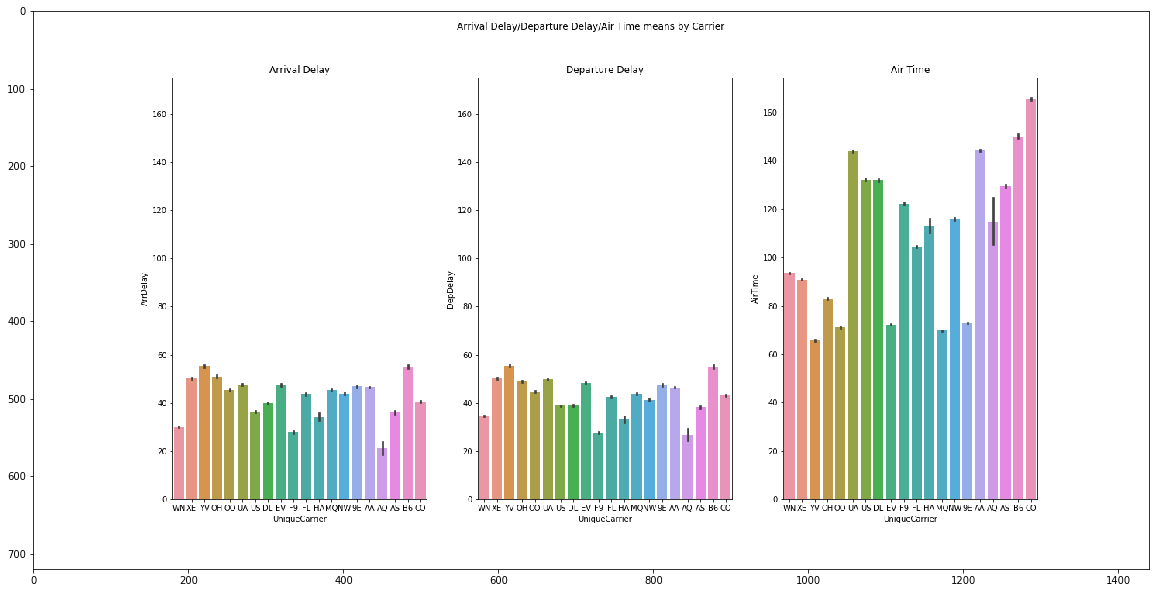

In [25]:
plt.figure(figsize=(20,20))
pil_im = Image.open('barplots arrdelay depdelay airtime by carrier.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.show()